In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [96]:
def read_mnist(digit_value, num_images):
    mnist_img = np.load(r'')
    digit_indices = np.where(mnist_img[:,0] == 3)[0]
    selected_indices = np.random.choice(digit_indices, size = num_images, replace = False)

    for idx in selected_indices:
        plt.imshow(mnist_img[idx, 1:].reshape(28,28), cmap = 'gray')
        plt.show()
    

In [91]:
!pip install keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------- --------------------- 20.5/46.2 kB 640.0 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/46.2 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 461.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.1 MB 3.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 4.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.6/1.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---- -----------

In [100]:
!pip install tensorflow --user

  Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached ml_dtypes-0.3.2-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.63.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl (2.1 kB)
Using cached 

In [107]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000,28,28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

In [186]:
idx = np.random.randint(0,60000)
image = x_train[idx]

In [187]:
idx1 = np.random.randint(0,60000)
img2 = x_train[idx1]

In [188]:
def display_img(bef_img, aft_img):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(bef_img, cmap = 'gray')
    axes[0].set_title("Before")
    axes[1].imshow(aft_img, cmap = 'gray')
    axes[1].set_title("After")
    plt.show()

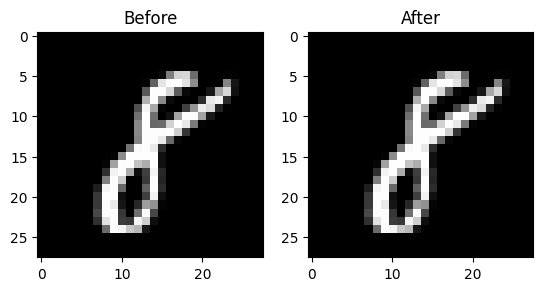

In [189]:
display_img(image, image)

In [134]:
def grayscale(img):
    height, width, channels = img.shape
    grayscale_img = np.zeros((height, width))
    for x in range(height):
        for y in range(width):
            pixelValue = sum(img[x,y])/channels
            grayscale_img[x,y] = pixelValue
    return grayscale_img
            

In [137]:
def grayscale(img):
    
    if len(img.shape) == 2:
        height, width = img.shape
        grayscale_img = img.copy()
    else:
        height, width, channels = img.shape
        grayscale_img  = np.zeros((height, width))
        for x in range(height):
            for y in range(width):
                pixelValue = sum(img[x,y])/channels
                grayscale_img[x,y] = pixelValue
    return grayscale_img

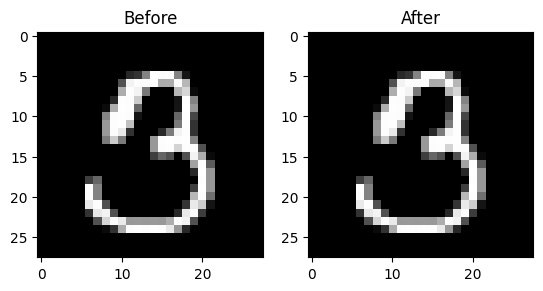

In [138]:
grayscale_img = grayscale(image)
display_img(image, grayscale_img)

In [151]:
def crop_img(img, height, width, x, y):
    height, width = img.shape
    cropped_img = img [x:x+width, y:y+height]
    return cropped_img

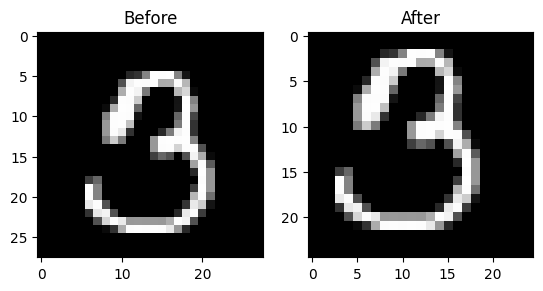

In [153]:
cropped = crop_img(image, 20,20, 3, 3)
display_img(image, cropped)

In [190]:
def addImages(img1, img2):
    assert img1.shape == img2.shape, "Images must have the same size"
    height, width = img1.shape
    addedImg= img1 + img2
    for y in range(height):
        for  x in range(width):
                addedImg[y,x] = min(int(img1[y,x]) + int(img2[y,x]), 255)
    return addedImg

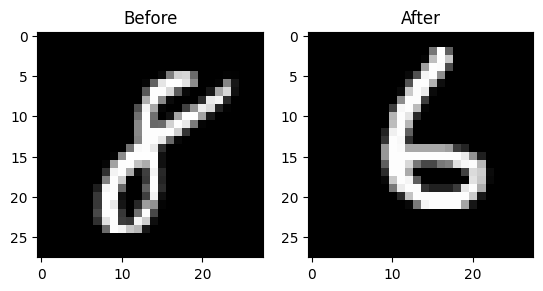

In [192]:
display_img(image, img2)

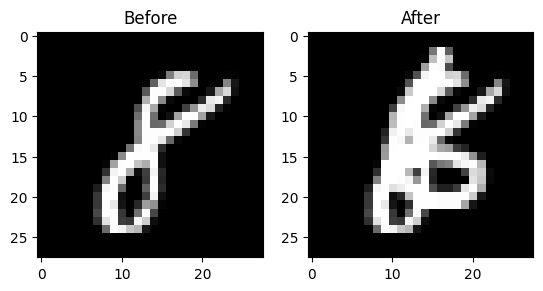

In [193]:
add = addImages(image, img2)

display_img(image, add)

In [197]:
def subtract_img(img1, img2):
    assert img1.shape == img2.shape, "images must have the same size"
    height, width = img1.shape
    sub_img  = img1.copy()
    for y in range(height):
        for x in range(width):
            # for c in range(channels):
                sub_img[y,x] = max(int(img1[y,x]) - int(img2[y,x]), 0)
    return sub_img

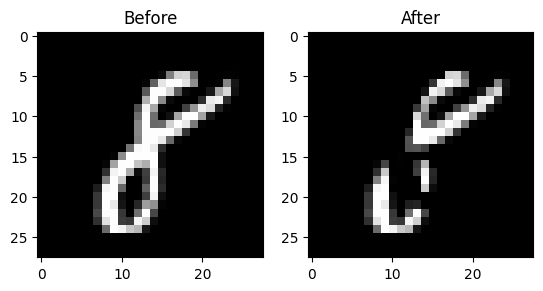

In [199]:
sub_img = subtract_img(image, img2)
display_img(image, sub_img)

In [70]:
def and_op(img1, img2):
    height , width = len(img1), len(img1[0])
    result = [[0 for _i in width] for _ in height]
    for i in range(height):
        for j in range(width):
            result[i][j] = img1[i][j] & img2[i][j]
    return result


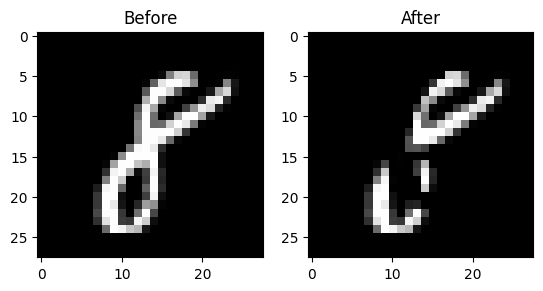

In [200]:
and_img = subtract_img(image, img2)
display_img(image, and_img)

In [211]:
def or_op(img1, img2):
    height, width = img1.shape
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = img1[i][j] | img2[i][j]
    return result

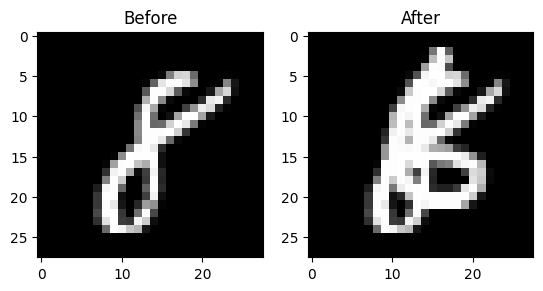

In [212]:
or_img = or_op(image, img2)
display_img(image, or_img)

In [218]:
def not_op(img):
    height, width = len(img), len(img[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = 255 - img[i][j]
    return result

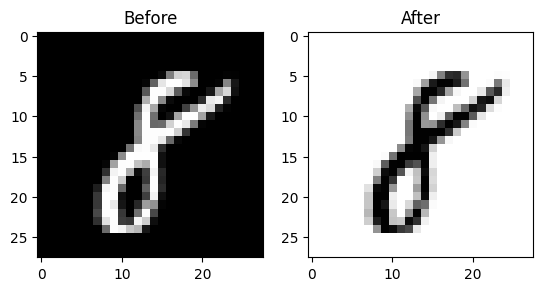

In [219]:
not_imgg = not_op(image)
display_img(image, not_imgg)

In [221]:
def xor(img1, img2):
    height, width = len(img1), len(img1[0])
    result = [[ 0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = img1[i][j] ^ img2[i][j]
    return result

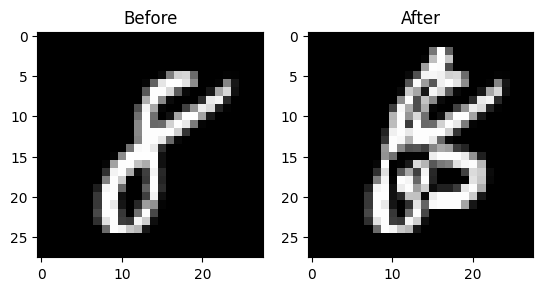

In [222]:
xor_img = xor(image, img2)
display_img(image, xor_img)

In [223]:
def left_shift(img, bits):
    return np.left_shift(img, bits)
def right_shift(img, bits):
    return np.right_shift(img, bits)

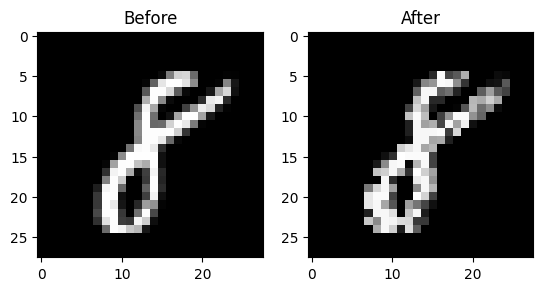

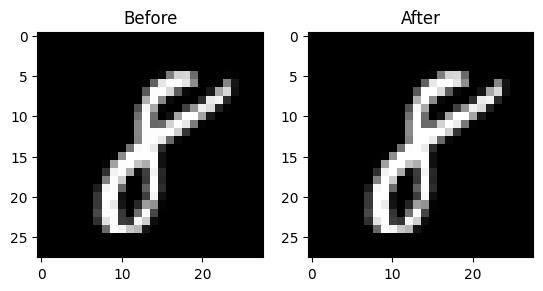

In [227]:
left = left_shift(image, 2)
display_img(image, left)
right = right_shift(image, 2)
display_img(image, right)

In [233]:
def thresholding(img, threshold_val):
    height, width = img.shape
    grayscale_img = np.zeros((height, width))
    for x in range(height):
        for y in range(width):
            pixelValue = int(img[x,y])
            grayscale_img[x][y] = pixelValue
    threshold_img = np.zeros_like(grayscale_img)
    threshold_img[grayscale_img > threshold_img] = 255
    return threshold_img

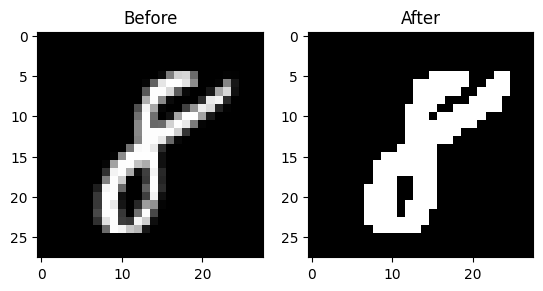

In [234]:
thresh = thresholding(image, 55)
display_img(image, thresh)

In [237]:
def gray_slice_bg(image, a, b): #with bg
    gray_img = grayscale(image)
    h, w = image.shape
    wbg = np.zeros((h,w), np.uint8)
    for i in range(h):
        for j in range(w):
            r = gray_img[i][j]
            if a <= r <= b:
                wbg[i][j] = 255
            else:
                wbg[i][j] = r
    return wbg

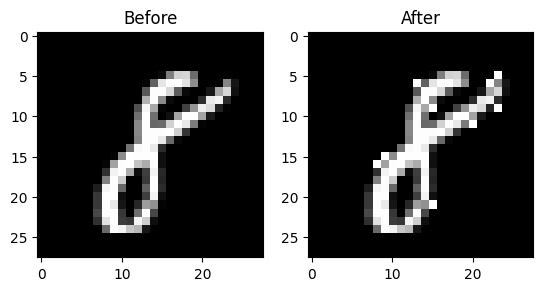

In [238]:
gray_bg = gray_slice_bg(image, 3, 6)
display_img(image, gray_bg)

In [248]:
def gray_slice_no_bg(img, a, b):
    gray_img = grayscale(img)
    h, w = image.shape
    wbg = np.zeros((h,w), np.uint8)
    for i in range(h):
        for j in range(w):
            if a <= gray_img[i][j] <= b:
                wbg[i][j] = 255
            else:
                wbg[i][j] = 0
    return wbg

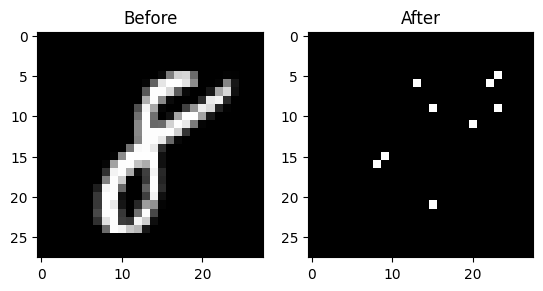

In [249]:
gray_no_bg = gray_slice_no_bg(image, 3, 6)
display_img(image, gray_no_bg)

In [252]:
def plot_grayscale_hist(image):
    hist, bins = np.histogram(image.ravel(), bins = 256, range = (0,256))
    plt.figure(figsize = (8,6))
    plt.title("Grayscale Image Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.bar(bins[:-1], hist, width = 10, color = 'gray')
    plt.show()

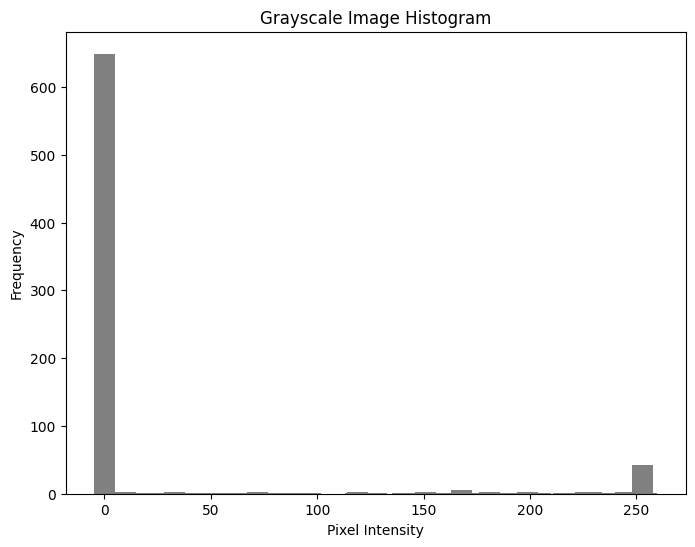

In [253]:
plot_grayscale_hist(img2)

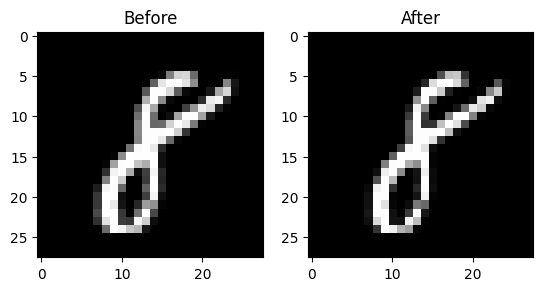

In [261]:
def contrast_stretch(image, s1, s2, r1, r2):
    og_shape = image.shape
    temp_img = image.flatten()
    new_img = []
    alpha = s1/r1
    beta = (s2 - s1)/(r2 - r1)
    gamma = (255 - s2)/(255 - s1)
    for pixel in temp_img:
        if(pixel < r1):
            new_img.append(alpha * pixel)
        elif(pixel >= r1 and pixel <= r2):
            new_img.append(beta*(pixel - r1) + s1)
        else:
            new_img.append(gamma*(pixel - r2) + s2)
    return np.array(new_img).reshape(og_shape)
contrast_img = contrast_stretch(image, 0, 20, 3, 90)
display_img(image, contrast_img)
    

In [264]:
import math
def Power(image, c, gamma):
    og_shape = image.shape
    temp_img = image.flatten()
    new_img = []
    for i in temp_img:
        new_val = c* math.pow(i, gamma)
        new_img.append(min(round(new_val), 255))
    return np.array(new_img).reshape(og_shape)

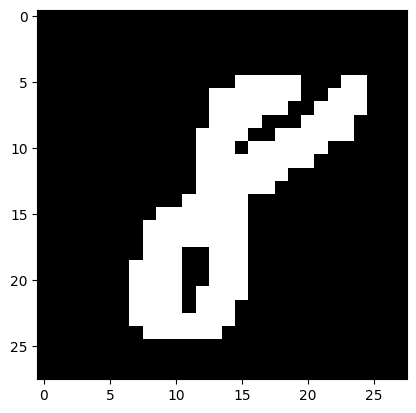

In [265]:
power = Power(image, 3, 8)
plt.imshow(power, cmap= 'gray')

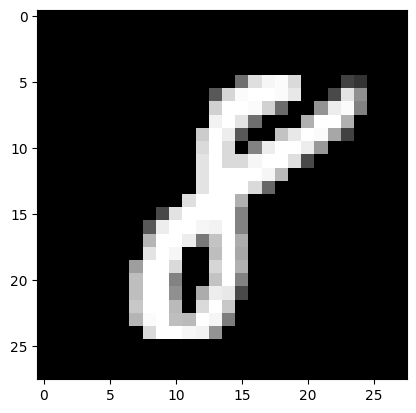

In [271]:
def logs(image, c):
    og_shape = image.shape
    temp_img = image.flatten()
    new_img = []
    for i in temp_img:
        new_val = c* np.log(1+i)
        new_img.append(round(new_val))
    return np.array(new_img).reshape(og_shape)
plt.imshow(logs(image, 10), cmap = 'gray')

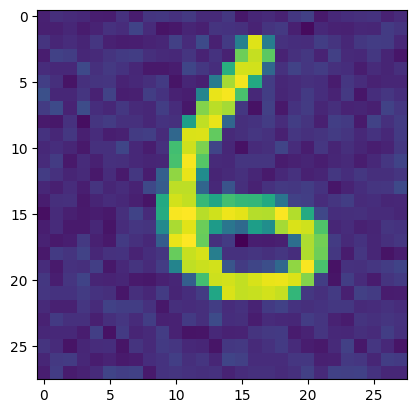

In [272]:
def guassian(image, mean, sigma):
    guassian_noise = np.random.normal(mean, sigma, image.shape)
    new_img = image + guassian_noise
    return new_img
plt.imshow(guassian(img2, 4, 12))

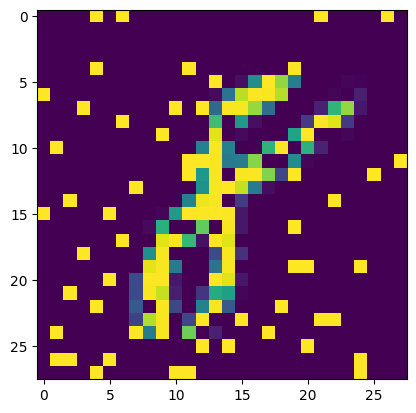

In [279]:
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    row, col = noisy_image.shape
    salt_thres = 1 - salt_prob
    pepper_thresh = pepper_prob

    salt_noise = np.random.random((row, col))
    noisy_image[salt_noise > salt_thres] = 255
    pepper_noise = np.random.random((row, col))
    noisy_image[pepper_noise < pepper_thresh] = 0
    return noisy_image
plt.imshow(add_salt_pepper_noise(image, 0.1, 0.2))

In [280]:
import numpy as np

def apply_filter(image, mask):
    row, col = image.shape
    mh, mw = mask.shape
    filtered_img = np.zeros(image.shape)

    for i in range(row - mh + 1):
        for j in range(col - mw +1):
            part = image[i : i+mh, j:j+mw] * mask
            filtered_img[i,j] = part.sum()
    return filtered_img

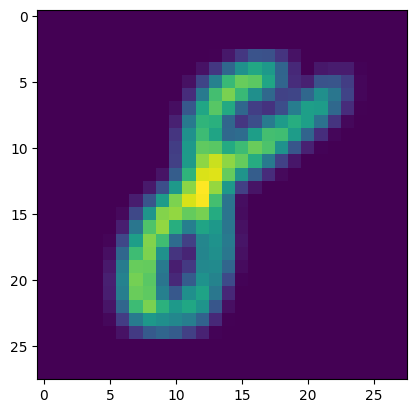

In [281]:
mask = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
filter = apply_filter(image, mask)
plt.imshow(filter)

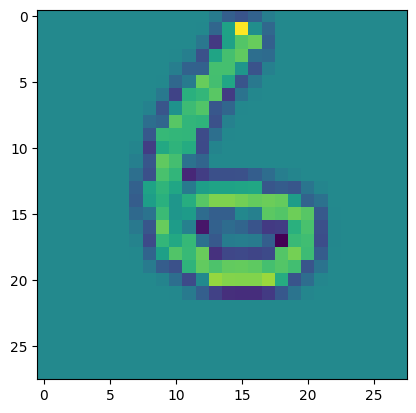

In [283]:
#high pass
def high_pass(image):
    return apply_filter(image, np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
high_pass_img = high_pass(img2)
plt.imshow(high_pass_img)

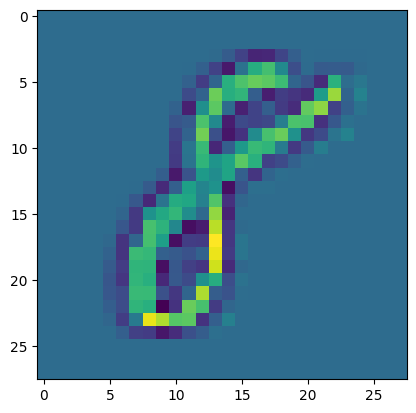

In [289]:
#high boost
def high_boost(image,A):
    return (A-1)*image + high_pass(image)
high_boost_img  = high_boost(image, 70)
plt.imshow(high_boost_img)

In [296]:
def hist_stretch(image, r_min, r_max):
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    stretched_img  = ((r_max - r_min)/(max_pixel- min_pixel)) * (image - min_pixel) + r_min
    stretched_img = np.clip(stretched_img, 0, 255)

    return stretched_img.astype(np.uint8)

In [317]:
import cv2

cv2.imshow("hist", hist_stretch(image, 0, 100))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [318]:
def hist_equal(img):
    hist, bins = np.histogram(img.flatten(), bins = 256)
    cdf = hist.cumsum()
    normalized_cdf = (cdf - cdf.min())*255/(cdf.max() - cdf.min())
    equalized_img = np.interp(image.flatten(), bins[:-1], normalized_cdf)
    return equalized_img.reshape(img.shape)

In [329]:
def erosion(image, mask):
    eroded_image = np.zeros_like(image)
    row_pad = mask.shape[0]//2
    col_pad = mask.shape[1]//2
    padded_img = np.pad(image,((row_pad, row_pad),(col_pad, col_pad)))
    kernel_mask = (mask == 1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_array = padded_img[i:i+mask.shape[0], j:j+mask.shape[1]]
            if np.all(sub_array[kernel_mask]):
                eroded_image[i,j] = 1
    return eroded_image
            

In [330]:
def dilation(image, mask):
  row_pad = mask.shape[0]//2
  col_pad = mask.shape[1]//2
  dilated_img = np.zeros(image.shape)
  padded_img = np.pad(image, ((row_pad, row_pad), (col_pad, col_pad)))
  kernel = (mask==1)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      sub_array = padded_img[i:i+mask.shape[0], j:j+mask.shape[1]]
      if(np.any(sub_array[kernel])):
        dilated_img[i,j] = 1
  return dilated_img

In [331]:
def opening(image,mask):
    return dilation(erosion(image,mask),mask)

def closing(image, mask):
  return erosion(dilation(image, mask), mask)


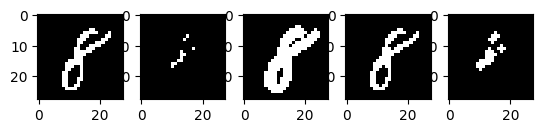

In [332]:
figure, axis = plt.subplots(1,5)

binary_image = np.where(image>128, 1,0)

eroded_img = erosion(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[1].imshow(eroded_img, cmap='gray')
dilated_img = dilation(binary_image,  np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[2].imshow(dilated_img, cmap='gray')
close=closing(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[3].imshow(close, cmap='gray')
open = opening(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[4].imshow(open, cmap='gray')
axis[0].imshow(binary_image, cmap='gray')
plt.show()

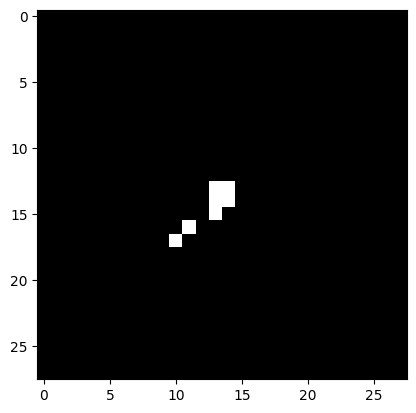

In [333]:
def hmt(image, b1, b2):
  image_c = np.where(image==0, 1, 0)
  hmt = np.bitwise_and(erosion(image, b1), erosion(image_c, b2))
  return hmt

hmt = hmt(binary_image, np.array([[1,1,1],[0,1,0],[0,1,0]]),np.array([[0,0,0],[0,0,-1],[0,0,-1]]))
plt.imshow(hmt, cmap='gray')

In [336]:
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image

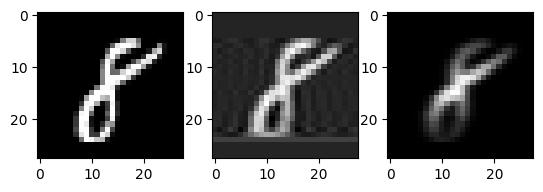

In [337]:
#ideal low pass
def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=np.fft.ifft(s3).real
    s5=center_img(s4)
    return s5

#gaussian low pass
def gauss_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
    s3=s2*huv
    s4=np.fft.ifft(s3)
    s5=np.array([elem.real for elem in np.fft.ifft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

g_lp_filter_img = gauss_lp_filter(image, 10)
ideal_lp_filter_img=ideal_lp_filter(image, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_lp_filter_img, cmap='gray')
axis[2].imshow(g_lp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')


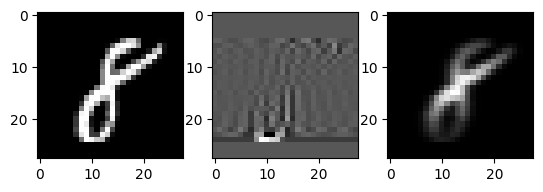

In [338]:
#ideal high pass
def ideal_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = (math.sqrt(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) > t)
  s3 = s2*huv
  s4= np.fft.ifft(s3).real
  s5 = center_img(s4)
  return s5

def gauss_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = np.exp(-2*(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) / math.pow(t,2))
  s3 = s2*huv
  s4 = np.fft.ifft(s3).real
  s5= center_img(s4)
  return s5

g_hp_filter_img = gauss_hp_filter(image, 10)
ideal_hp_filter_img=ideal_hp_filter(image, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_hp_filter_img, cmap='gray')
axis[2].imshow(g_hp_filter_img, cmap='gray')
axis[0].imshow(image, cmap='gray')
